<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210928TryJapaneseOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Japanese OCR compatible with vertical/holizontal text

In [ ]:
!pip install easyocr --no-deps # Colab already has all dependencies
! pip install python-bidi

     |████████████████████████████████| 63.6 MB 26 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.4.1 requires opencv-python-headless, which is not installed.


In [ ]:
!wget https://shop.r10s.jp/ochayasan-chokubaijo/cabinet/intro2-1.jpg

--2021-09-28 11:45:05--  https://shop.r10s.jp/ochayasan-chokubaijo/cabinet/intro2-1.jpg
Resolving shop.r10s.jp (shop.r10s.jp)... 104.18.4.197, 104.18.5.197, 2606:4700::6812:4c5, ...
Connecting to shop.r10s.jp (shop.r10s.jp)|104.18.4.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121033 (118K) [image/jpeg]
Saving to: ‘intro2-1.jpg’

intro2-1.jpg        100%[===================>] 118.20K  --.-KB/s    in 0.02s   

2021-09-28 11:45:06 (7.06 MB/s) - ‘intro2-1.jpg’ saved [121033/121033]

--2021-09-28 11:45:06--  http://water.jpg/
Resolving water.jpg (water.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘water.jpg’
FINISHED --2021-09-28 11:45:06--
Total wall clock time: 1.2s
Downloaded: 1 files, 118K in 0.02s (7.06 MB/s)


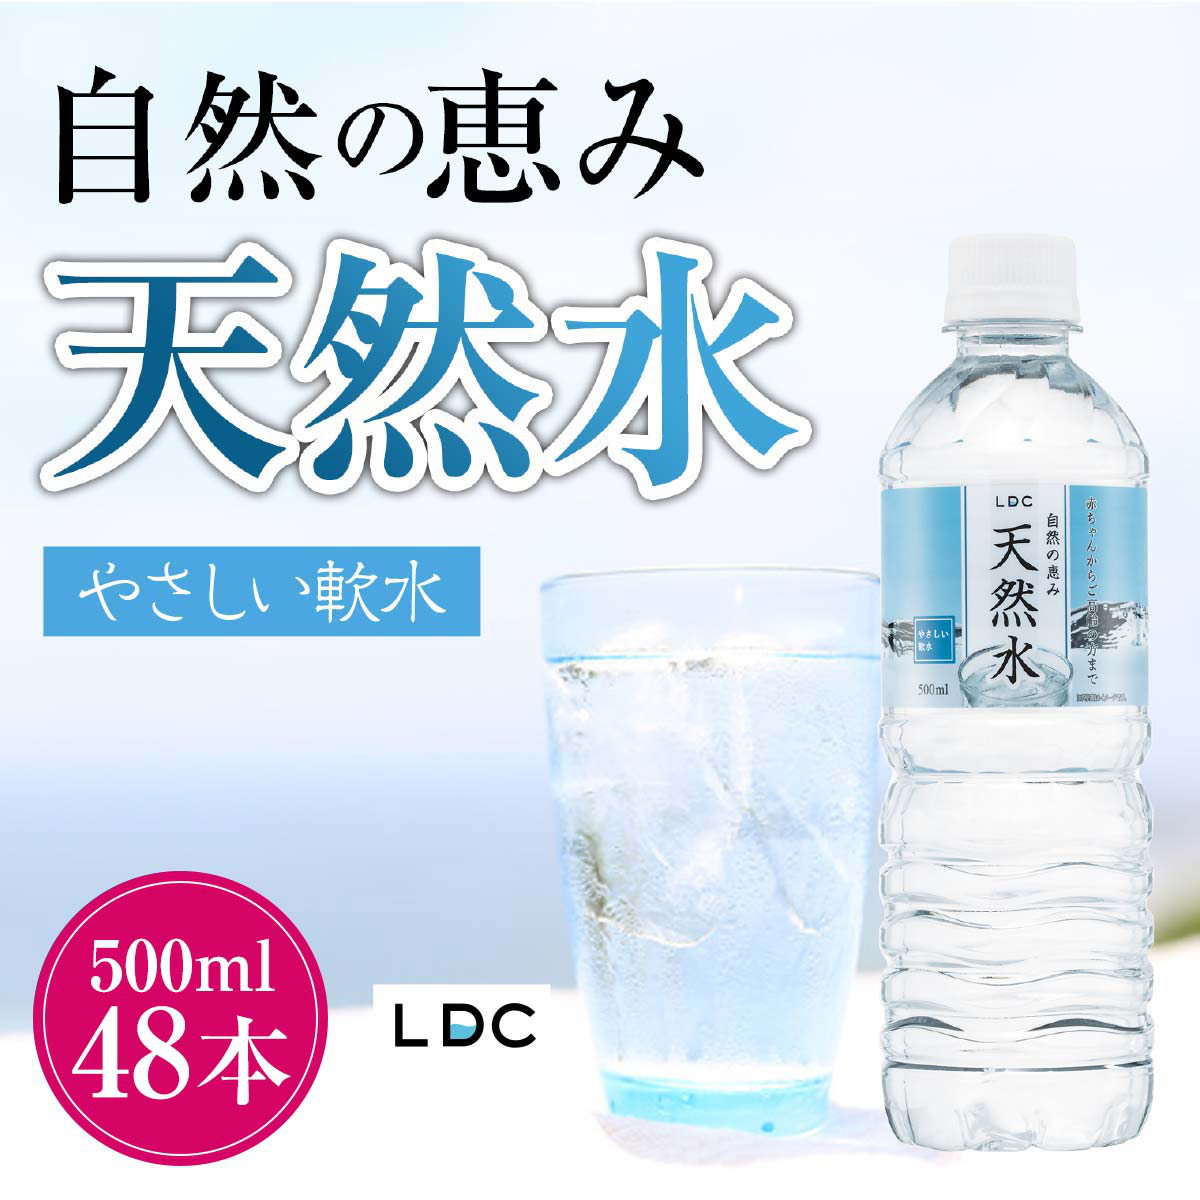

In [9]:
# show an image
import PIL
from PIL import ImageDraw
jp_img = "intro2-1.jpg"
im = PIL.Image.open(jp_img)
im

In [10]:
# Doing OCR. Get bounding boxes.
import easyocr
reader = easyocr.Reader(['ja','en'])
bounds = reader.readtext(jp_img)
bounds

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[39, 57], [717, 57], [717, 219], [39, 219]], '自然の恵み', 0.9874935456206428),
 ([[11, 225], [824, 225], [824, 513], [11, 513]], '爽然ハ', 0.0278049179641009),
 ([[73, 550], [452, 550], [452, 634], [73, 634]],
  'やさしい軟水',
  0.9771674970945224),
 ([[917, 627], [951, 627], [951, 641], [917, 641]],
  'やきしじ',
  0.2925178110599518),
 ([[981, 487], [1045, 487], [1045, 691], [981, 691]],
  '秦',
  0.002349693537432432),
 ([[1045, 513], [1063, 513], [1063, 599], [1045, 599]],
  '?',
  0.01908302405807505),
 ([[917, 683], [951, 683], [951, 697], [917, 697]], 'sml', 0.5059700826668442),
 ([[82, 928], [286, 928], [286, 1002], [82, 1002]],
  '50Oml',
  0.5347850730973771),
 ([[390, 992], [543, 992], [543, 1057], [390, 1057]],
  'LDC',
  0.808786127017315),
 ([[59, 990], [302, 990], [302, 1118], [59, 1118]], '48本', 0.9841963916908398)]

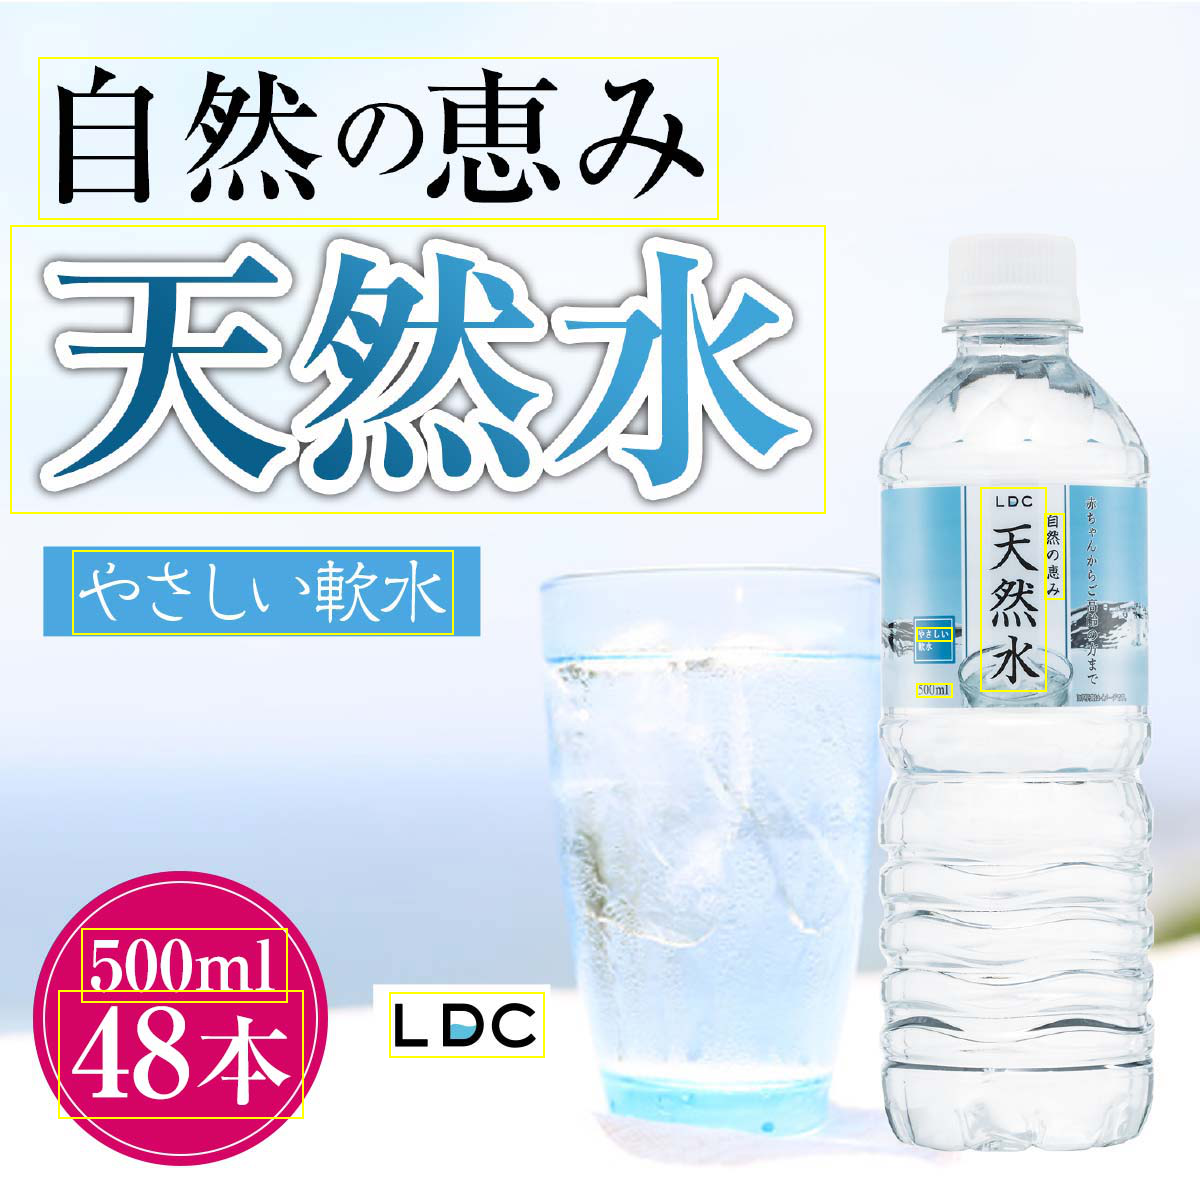

In [11]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)